# Market Share Analysis

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\envs\gputest\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


#### Importing Dataset

In [68]:
ham = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Work/Final_Data/home_appliance_market.csv")
im = pd.read_csv("C:/Users/shrey/OneDrive/Desktop/Work/Final_Data/Insurance_market.csv")

In [69]:
im.head()

,Brand,Product,Insurance_provider,Insurance_product,Amt_cov_share_byBrnd_prod,Issues_raised,Issues_resolved,Ins_avg_review_OO10
0,Electrolux,Blender,Bajaj,Accidental,0.20,517,475,9.5
1,Electrolux,Blender,Bajaj,full_cover_5yr,0.20,589,541,9.5
2,Electrolux,Blender,Bajaj,lifetime,0.10,535,502,9.6
3,Electrolux,Blender,Home_Assist,Accidental,0.10,569,483,9.1
4,Electrolux,Blender,Home_Assist,full_cover_5yr,0.15,502,426,9.2


In [5]:
ham.head()

,Month,Year,Product,Brand,Units_sale,Revenue,Returned_units,Issues_raised,Issues_resolved,Units_insured,Amount_insured,Brand_avg_review_OO10
0,Apr,2019,Refrigerator,LG,3970,129874580,22,271,262,1191,38962374.00,8.9
1,Apr,2019,Microwave,LG,4256,50271872,20,248,238,1064,12567968.00,8.7
2,Apr,2019,WaterPurifier,LG,3608,45215456,45,266,252,974,12208173.12,8.8
3,Apr,2019,WashingMachine,LG,3690,101991600,26,264,258,1107,30597480.00,9.4
4,Apr,2019,Blender,LG,3462,23569296,43,290,284,969,6599402.88,8.6


## Analysis based on Units Sold

#### Brand Wise

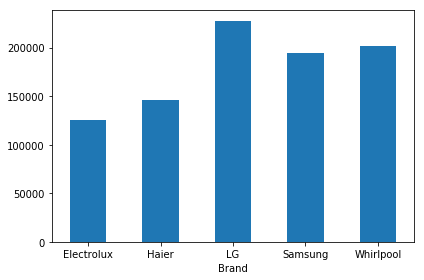

In [27]:
# Brand wise product distribution of units sold
ham.groupby('Brand').sum()['Units_sale'].plot.bar()
plt.rcParams["figure.figsize"] = (10,3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
ham.groupby(['Brand'])['Units_sale','Revenue'].sum()

,Units_sale,Revenue
Brand,,
Electrolux,125144,2169081608
Haier,145976,2511407792
LG,227508,3949608283
Samsung,194102,3332153683
Whirlpool,202056,3542914613


- LG sold the maximum products and have the highest overall revenue in year 2019

#### Product Wise

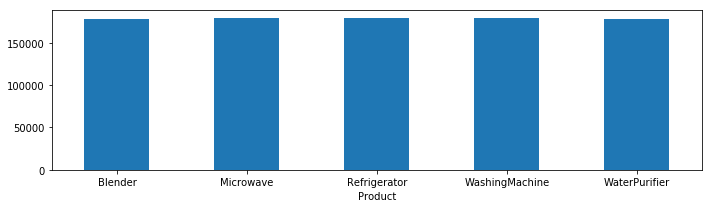

In [28]:
# maximum Units sales per product

ham.groupby('Product').sum()['Units_sale'].plot.bar()
plt.rcParams["figure.figsize"] = (10,3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
ham.groupby(['Product'])['Units_sale','Revenue'].sum()

,Units_sale,Revenue
Product,,
Blender,178275,1136233267
Microwave,179174,2077580364
Refrigerator,179915,5488019749
WashingMachine,179181,4771872704
WaterPurifier,178241,2031459895


- Almost all products are sold in the same quantity but product refrigerator created the maximum revenue for the companies

In [36]:
ham.groupby(['Brand','Product'])['Units_sale','Revenue'].sum()

Units_sale     Revenue
Brand      Product                               
Electrolux Blender              25942   169181652
           Microwave            25408   306140120
           Refrigerator         24432   739905704
           WashingMachine       25032   674089523
           WaterPurifier        24330   279764609
Haier      Blender              28234   187161143
           Microwave            29053   333884518
           Refrigerator         29366   886500780
           WashingMachine       28712   761172708
           WaterPurifier        30611   342688643
LG         Blender              45777   296312625
           Microwave            45138   507893089
           Refrigerator         46670  1426346153
           WashingMachine       45274  1205356355
           WaterPurifier        44649   513700061
Samsung    Blender              38600   230753910
           Microwave            38238   440370229
           Refrigerator         39136  1185843481
           WashingMachine       38642  1030964843
           WaterPurifier        39486   444221220
Whirlpool  Blender              39722   252823937
           Microwave            41337   489292408
           Refrigerator         40311  1249423631
           WashingMachine       41521  1100289275
           WaterPurifier        39165   451085362

- Combined info of Units sold and revenue combining Brand and Product

## Analysis on Issues

In [41]:
ham.groupby(['Brand'])['Issues_raised','Issues_resolved'].mean()

,Issues_raised,Issues_resolved
Brand,,
Electrolux,374.066667,342.566667
Haier,320.933333,293.700000
LG,248.600000,239.183333
Samsung,328.850000,313.583333
Whirlpool,370.716667,338.850000


- By taking average no of issues raised, LG have least and Electrolux have max issues.

In [42]:
ham.groupby(['Product'])['Issues_raised','Issues_resolved'].mean()

,Issues_raised,Issues_resolved
Product,,
Blender,327.233333,304.500000
Microwave,330.533333,306.983333
Refrigerator,327.616667,304.816667
WashingMachine,328.400000,305.450000
WaterPurifier,329.383333,306.133333


- By taking average no of issues raised, almost all products have similar numbers of average issues

In [23]:
ham.groupby(['Brand','Product'])['Issues_raised','Issues_resolved'].sum()

Issues_raised  Issues_resolved
Brand      Product                                       
Electrolux Blender                  4468             4065
           Microwave                4547             4163
           Refrigerator             4451             4092
           WashingMachine           4489             4116
           WaterPurifier            4489             4118
Haier      Blender                  3873             3549
           Microwave                3838             3498
           Refrigerator             3839             3518
           WashingMachine           3880             3561
           WaterPurifier            3826             3496
LG         Blender                  3029             2925
           Microwave                2905             2801
           Refrigerator             3024             2906
           WashingMachine           2932             2819
           WaterPurifier            3026             2900
Samsung    Blender                  3919             3744
           Microwave                3960             3780
           Refrigerator             3899             3719
           WashingMachine           3950             3766
           WaterPurifier            4003             3806
Whirlpool  Blender                  4345             3987
           Microwave                4582             4177
           Refrigerator             4444             4054
           WashingMachine           4453             4065
           WaterPurifier            4419             4048

- Brand and Product wise Issues raised and resolved

- __Unresolved issues__

In [105]:
# Unresolved issues by the companies
Unresolved = ham['Issues_raised'] - ham['Issues_resolved']
ham['Issues_unresolved'] = Unresolved

In [106]:
# Maximum no of unresolved issues per company

df_ham = ham.groupby(['Brand'])['Issues_raised','Issues_unresolved'].sum()
df_ham

,Issues_raised,Issues_unresolved
Brand,,
Electrolux,22444,1890
Haier,19256,1634
LG,14916,565
Samsung,19731,916
Whirlpool,22243,1912


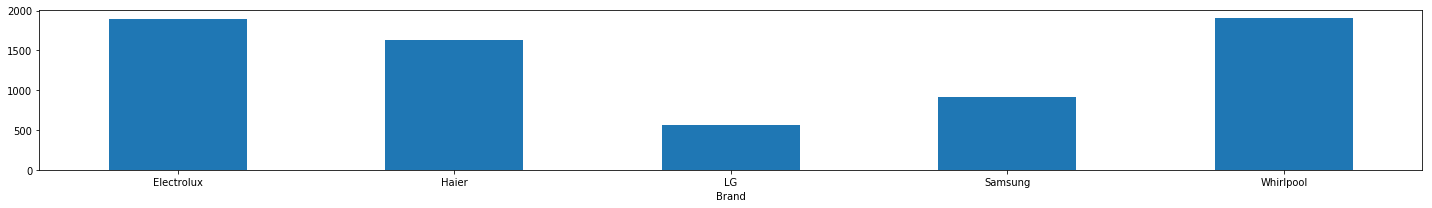

In [111]:
# Company having maximum no of unresolved complaints( Customer service )

ham.groupby('Brand').sum()['Issues_unresolved'].plot.bar()
plt.rcParams["figure.figsize"] = (70,3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [112]:
# Percentage of unresolved issues as per Insurance provider

df_ham['Perc_unresolved_issues'] = (df_ham['Issues_unresolved']/df_ham['Issues_raised'])*100
df_ham

,Issues_raised,Issues_unresolved,Perc_unresolved_issues
Brand,,,
Electrolux,22444,1890,8.420959
Haier,19256,1634,8.485667
LG,14916,565,3.787879
Samsung,19731,916,4.642441
Whirlpool,22243,1912,8.595963


- Electrolux and whirlpool have maximum percentage of unresolved complaints 
- LG have least unresolved complaints

In [54]:
ham.groupby(['Brand','Product'])['Issues_unresolved'].mean()

Brand       Product       
Electrolux  Blender           33.583333
            Microwave         32.000000
            Refrigerator      29.916667
            WashingMachine    31.083333
            WaterPurifier     30.916667
Haier       Blender           27.000000
            Microwave         28.333333
            Refrigerator      26.750000
            WashingMachine    26.583333
            WaterPurifier     27.500000
LG          Blender            8.666667
            Microwave          8.666667
            Refrigerator       9.833333
            WashingMachine     9.416667
            WaterPurifier     10.500000
Samsung     Blender           14.583333
            Microwave         15.000000
            Refrigerator      15.000000
            WashingMachine    15.333333
            WaterPurifier     16.416667
Whirlpool   Blender           29.833333
            Microwave         33.750000
            Refrigerator      32.500000
            WashingMachine    32.333333
            W

- As we can see from above data, LG have least amount of unresolved issues for all products, so we can deduce it provides best customer service

## Analysis based on Brand Ratings

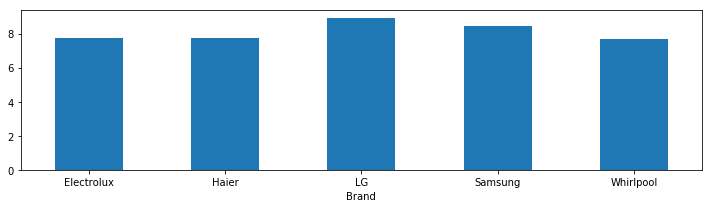

In [39]:
ham.groupby('Brand').mean()['Brand_avg_review_OO10'].plot.bar()
plt.rcParams["figure.figsize"] = (70,3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
# company have the highest Brand review rating

df4 = ham.groupby(['Brand'])['Brand_avg_review_OO10'].mean()
df4

Brand
Electrolux    7.716667
Haier         7.745000
LG            8.945000
Samsung       8.463333
Whirlpool     7.681667
Name: Brand_avg_review_OO10, dtype: float64

- LG have the max average review ratings among all companies

In [57]:
ham.groupby(['Brand','Product'])['Brand_avg_review_OO10'].mean()

Brand       Product       
Electrolux  Blender           7.633333
            Microwave         7.700000
            Refrigerator      7.833333
            WashingMachine    7.641667
            WaterPurifier     7.775000
Haier       Blender           7.700000
            Microwave         7.683333
            Refrigerator      7.500000
            WashingMachine    7.858333
            WaterPurifier     7.983333
LG          Blender           9.025000
            Microwave         8.966667
            Refrigerator      8.791667
            WashingMachine    9.025000
            WaterPurifier     8.916667
Samsung     Blender           8.525000
            Microwave         8.516667
            Refrigerator      8.425000
            WashingMachine    8.408333
            WaterPurifier     8.441667
Whirlpool   Blender           7.616667
            Microwave         7.616667
            Refrigerator      7.766667
            WashingMachine    7.808333
            WaterPurifier     7.60000

- LG have the mean best ratings across all products and brands

#### Selecting columns from Home Appliance dataset to merge with Insurance dataset for furthur analysis

In [70]:
df_ham = ham[['Brand','Product','Units_insured','Amount_insured']]

In [71]:
df2_ham = df_ham.groupby(['Brand','Product'])['Units_insured','Amount_insured'].sum()
df2_ham.head()

Units_insured  Amount_insured
Brand      Product                                      
Electrolux Blender                  4543    2.951168e+07
           Microwave                4398    5.321436e+07
           Refrigerator             4281    1.304060e+08
           WashingMachine           4478    1.206739e+08
           WaterPurifier            4182    4.790497e+07

#### Merging both the datasets

In [72]:
df_merge = pd.merge(im,df2_ham,on=['Brand','Product'])
df_merge.head()

,Brand,Product,Insurance_provider,Insurance_product,Amt_cov_share_byBrnd_prod,Issues_raised,Issues_resolved,Ins_avg_review_OO10,Units_insured,Amount_insured
0,Electrolux,Blender,Bajaj,Accidental,0.20,517,475,9.5,4543,29511682.17
1,Electrolux,Blender,Bajaj,full_cover_5yr,0.20,589,541,9.5,4543,29511682.17
2,Electrolux,Blender,Bajaj,lifetime,0.10,535,502,9.6,4543,29511682.17
3,Electrolux,Blender,Home_Assist,Accidental,0.10,569,483,9.1,4543,29511682.17
4,Electrolux,Blender,Home_Assist,full_cover_5yr,0.15,502,426,9.2,4543,29511682.17


In [73]:
df_merge['Units_insure'] = df_merge['Amt_cov_share_byBrnd_prod']*df_merge['Units_insured']
df_merge['Amt_insured'] = df_merge['Amt_cov_share_byBrnd_prod'] * df_merge['Amount_insured']

In [74]:
df_merge.head(5)

,Brand,Product,Insurance_provider,Insurance_product,Amt_cov_share_byBrnd_prod,Issues_raised,Issues_resolved,Ins_avg_review_OO10,Units_insured,Amount_insured,Units_insure,Amt_insured
0,Electrolux,Blender,Bajaj,Accidental,0.20,517,475,9.5,4543,29511682.17,908.60,5.902336e+06
1,Electrolux,Blender,Bajaj,full_cover_5yr,0.20,589,541,9.5,4543,29511682.17,908.60,5.902336e+06
2,Electrolux,Blender,Bajaj,lifetime,0.10,535,502,9.6,4543,29511682.17,454.30,2.951168e+06
3,Electrolux,Blender,Home_Assist,Accidental,0.10,569,483,9.1,4543,29511682.17,454.30,2.951168e+06
4,Electrolux,Blender,Home_Assist,full_cover_5yr,0.15,502,426,9.2,4543,29511682.17,681.45,4.426752e+06


In [76]:
df_merge2 = df_merge.groupby(['Brand','Product','Insurance_provider','Insurance_product'])['Units_insure','Amt_insured'].sum()
df_merge2

Units_insure  \
Brand      Product       Insurance_provider Insurance_product                 
Electrolux Blender       Bajaj              Accidental               908.60   
                                            full_cover_5yr           908.60   
                                            lifetime                 454.30   
                         Home_Assist        Accidental               454.30   
                                            full_cover_5yr           681.45   
...                                                                     ...   
Whirlpool  WaterPurifier Home_Assist        full_cover_5yr           671.40   
                                            lifetime                 335.70   
                         Oriental           Accidental               335.70   
                                            full_cover_5yr           335.70   
                                            lifetime                 335.70   

                                                                Amt_insured  
Brand      Product       Insurance_provider Insurance_product                
Electrolux Blender       Bajaj              Accidental         5.902336e+06  
                                            full_cover_5yr     5.902336e+06  
                                            lifetime           2.951168e+06  
                         Home_Assist        Accidental         2.951168e+06  
                                            full_cover_5yr     4.426752e+06  
...                                                                     ...  
Whirlpool  WaterPurifier Home_Assist        full_cover_5yr     7.703945e+06  
                                            lifetime           3.851973e+06  
                         Oriental           Accidental         3.851973e+06  
                                            full_cover_5yr     3.851973e+06  
                                            lifetime           3.851973e+06  

[225 rows x 2 columns]

## Market share analysis based on Brand, Products, Insurance Provider and Insurance products

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9DFE1C898>,
      dtype=object)

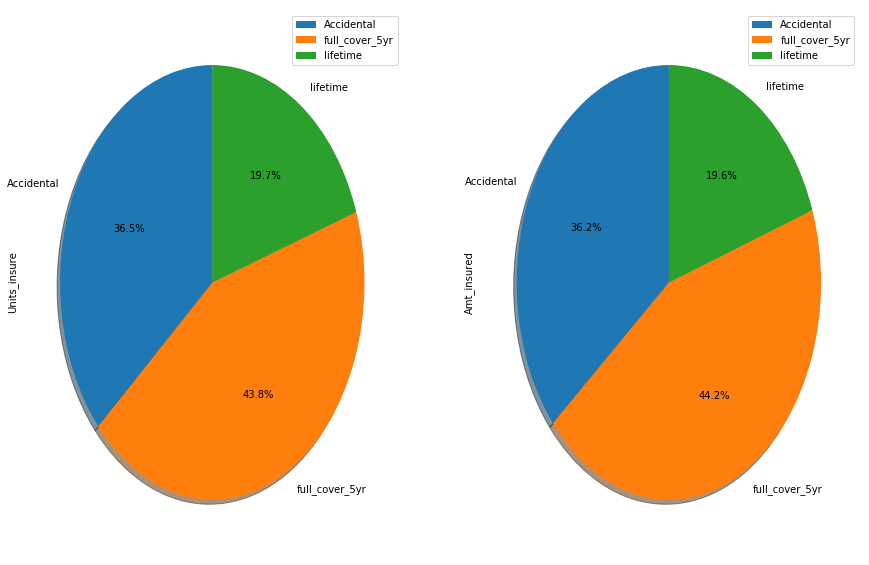

In [77]:
df_merge2.groupby(['Insurance_product']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')

- 44.2 % of insurance product is full cover 5 years

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9DFEC6358>,
      dtype=object)

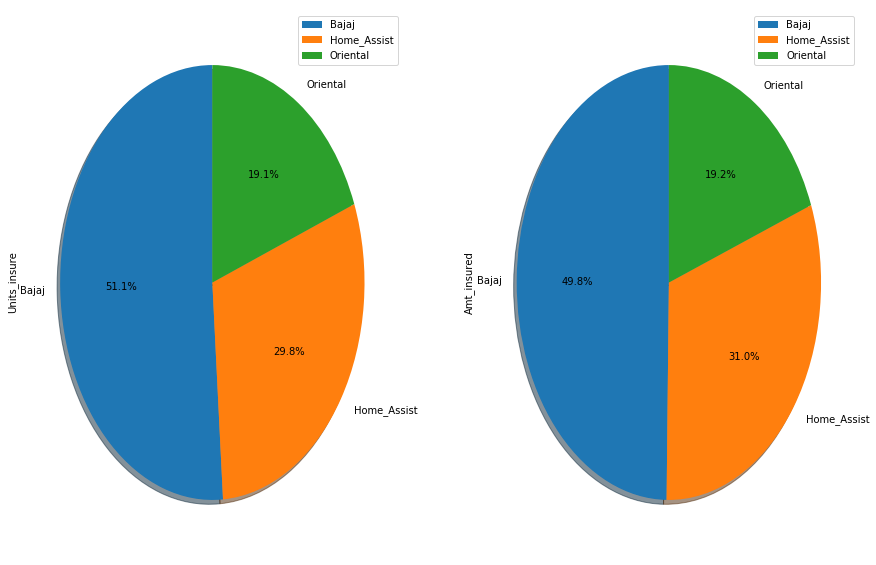

In [78]:
df_merge2.groupby(['Insurance_provider']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')

- Bajaj have the biggest market share in terms of units insured and amount of insurance as well in the market
- On second number, Home Assist also have huge market with them

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9DFF5ADA0>,
      dtype=object)

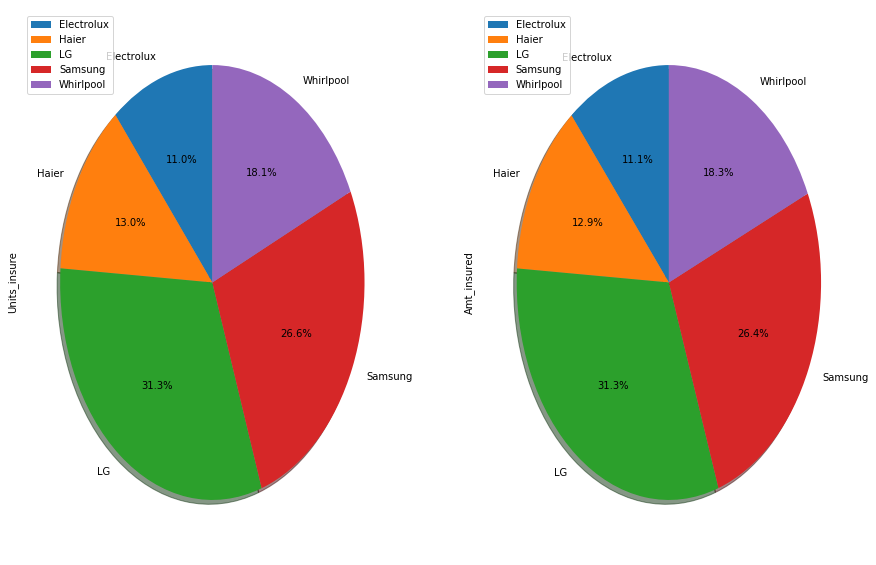

In [79]:
df_merge2.groupby(['Brand']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')

- LG company have most units insured and have maximum amount of insurance in the market

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9E0027CC0>,
      dtype=object)

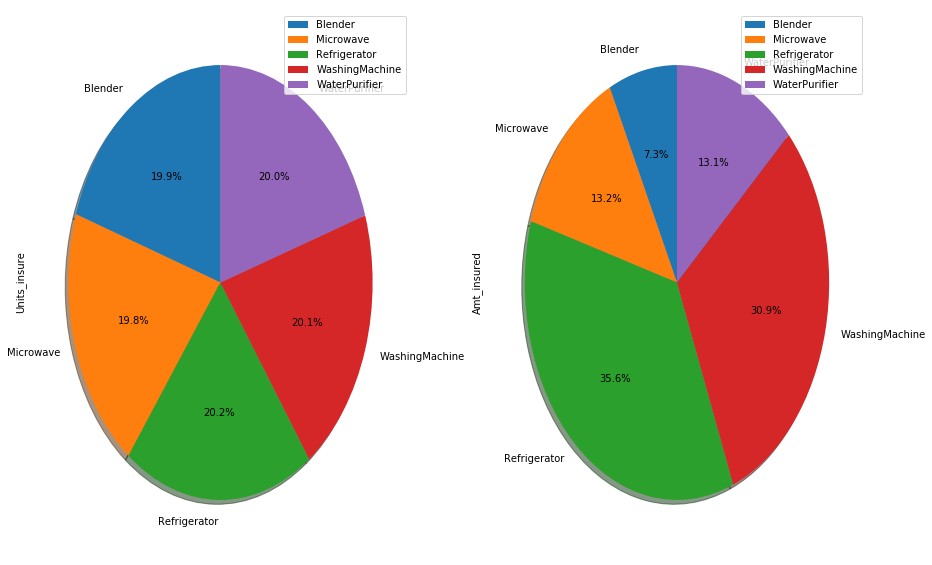

In [80]:
df_merge2.groupby(['Product']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')

## Analysis on Insurance ratings

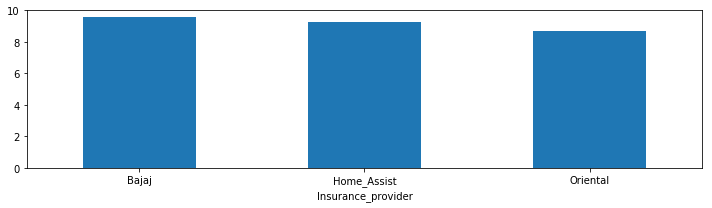

In [83]:
im.groupby('Insurance_provider').mean()['Ins_avg_review_OO10'].plot.bar()
plt.rcParams["figure.figsize"] = (70,3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [84]:
# company have the highest insurance review rating

df12 = im.groupby(['Insurance_provider'])['Ins_avg_review_OO10'].mean()
df12

Insurance_provider
Bajaj          9.557333
Home_Assist    9.264000
Oriental       8.686667
Name: Ins_avg_review_OO10, dtype: float64

- Bajaj have the highest mean rating among all insurance providers

#### Analysis on Unresolved Insurance company issues

In [96]:
unresolved = im['Issues_raised'] - im['Issues_resolved']
im['Unresolved'] = unresolved

In [97]:
# Maximum no of unresolved issues per company

df_iss = im.groupby(['Insurance_provider'])['Issues_raised','Unresolved'].sum()
df_iss

,Issues_raised,Unresolved
Insurance_provider,,
Bajaj,40946,3006
Home_Assist,40821,5179
Oriental,41461,9521


- Bajaj have got the least unresolved issues means they are giving better service but it will be more clear through percentages which we will calculate next

In [98]:
# Percentage of unresolved issues as per Insurance provider

df_iss['Perc_unresolved_issues'] = (df_iss['Unresolved']/df_iss['Issues_raised'])*100
df_iss

,Issues_raised,Unresolved,Perc_unresolved_issues
Insurance_provider,,,
Bajaj,40946,3006,7.341376
Home_Assist,40821,5179,12.687097
Oriental,41461,9521,22.963749


- Even when we compare the unresolved issues with the Issues raised, bajaj have least percentage of unresolved issues

In [99]:
df_iss = im.groupby(['Brand'])['Issues_raised','Unresolved'].sum()
df_iss

,Issues_raised,Unresolved
Brand,,
Electrolux,24506,3519
Haier,24528,3583
LG,25026,3457
Samsung,24529,3529
Whirlpool,24639,3618


In [100]:
df_iss['Perc_unresolved_issues'] = (df_iss['Unresolved']/df_iss['Issues_raised'])*100
df_iss

,Issues_raised,Unresolved,Perc_unresolved_issues
Brand,,,
Electrolux,24506,3519,14.359749
Haier,24528,3583,14.607795
LG,25026,3457,13.813634
Samsung,24529,3529,14.387052
Whirlpool,24639,3618,14.684038


- Almost all companies have same percentage of unresolved issues, but LG is doing better among all companies
- Considering LG as our client is good opportunity

In [91]:
# Maximum no of issues per brand ( for customer service)

df11 = im.groupby(['Product'])['Issues_raised'].sum()
df11

Product
Blender           24661
Microwave         24583
Refrigerator      24866
WashingMachine    24790
WaterPurifier     24328
Name: Issues_raised, dtype: int64

- Almost the no of issues raised with each product are similar, so it is not helping us to deduce something out of the analysis

In [92]:
# Percentage of unresolved issue product wise
df10['Perc_unresolved_issues'] = (df10['Unresolved']/df10['Issues_raised'])*100
df10

,Issues_raised,Unresolved,Perc_unresolved_issues
Brand,,,
Electrolux,24506,3519,14.359749
Haier,24528,3583,14.607795
LG,25026,3457,13.813634
Samsung,24529,3529,14.387052
Whirlpool,24639,3618,14.684038


- Almost all products have same percentage of unresolved issues, but Microwave is doing better among all products

## Analysis on Uninsured products

In [93]:
Units_not_insured = ham['Units_sale'] - ham['Units_insured']
ham['Units_uninsured'] = Units_not_insured

In [94]:
df_h = ham.groupby(['Brand','Product','Units_insured','Units_uninsured'])['Units_insured','Units_uninsured'].sum()
df_h.groupby(['Brand'])['Units_insured','Units_uninsured'].sum()

,Units_insured,Units_uninsured
Brand,,
Electrolux,21882,103262
Haier,25818,120158
LG,62288,165220
Samsung,52975,141127
Whirlpool,36094,165962


In [95]:
perc_uninsured = (ham['Units_insured'].sum() / ham['Units_sale'].sum())*100
perc_uninsured

22.246324819565796

- Only 22.246 % of products which are sold are insured, so we have a lot of scope to enter the market

- __Observations__
    - Bajaj is best insurance company in terms of customer service having least unresolved complaint of __7%__
    - Baja have the highest average insurance rating of __9.55__
    - Bajaj have the highest market share among all companies of about __49.8%__
    - LG have great customer service in resolving customer issues having least unresolved complaint of __3.78%__
    - Product Refrigerator created the maximum revenue for the companies.
    - LG have the highest average brand rating of __8.94__
    - LG have the maximum no of units insured and have highest amount of insurance, about __31%__
    - Only __22.246%__ of market is captured by insurance companies, so we have huge scope to enter the market